In [161]:
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv('quikr_car.csv')

In [14]:
df.sample(10)

,name,company,year,Price,kms_driven,fuel_type
57,Maruti Suzuki Swift VXi 1.2 ABS BS IV,Maruti,2017,"2,20,000","30,874 kms",Petrol
657,Hyundai Elantra 1.8 S,Hyundai,2012,"5,00,000","65,000 kms",Petrol
27,Maruti Suzuki Vitara Brezza ZDi,Maruti,2016,"2,90,000","15,975 kms",Diesel
828,Maruti Suzuki Swift Select Variant,Maruti,2008,"1,62,000","60,000 kms",Diesel
505,Maruti Suzuki Zen Estilo LXI Green CNG,Maruti,2008,"1,35,000","23,000 kms",Petrol
205,Tata Sumo Victa EX 10 by 7 Str BSIII,Tata,2012,"2,85,000","65,000 kms",Diesel
647,Hyundai Elite i20 Asta 1.2,Hyundai,2015,"5,00,000","22,000 kms",Petrol
142,Toyota Innova 2.5 GX BS IV 7 STR,Toyota,2012,"8,49,999","99,000 kms",Diesel
278,Renault Lodgy 85 PS RXL,Renault,2018,"6,89,999","20,000 kms",Diesel
93,Skoda Fabia 1.2L Diesel Elegance,Skoda,2011,"1,55,000","45,863 kms",Diesel


In [15]:
df.info()   # Missing values in columns kms_driven and fuel_type
            # Price and kms_driven should be integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [18]:
df.shape

(892, 6)

In [24]:
df['Price'].unique()   # Have to deal with commas between values and ask for price value

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [28]:
df['kms_driven'].unique()   # convert in integer, remove comma and kms 

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [29]:
df['year'].unique()   # so many grabage values here to deal with in year column

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [30]:
df['company'].unique()  # some garbage values here in company column

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha',
       'selling', 'URJENT', 'Swift', 'Used', 'Jaguar', 'Jeep', 'tata',
       'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7', '9',
       'scratch', 'urgent', 'sell', 'TATA', 'Any', 'Tara'], dtype=object)

In [31]:
df['name'].unique()  # vary inconsistent and tough to deal, we can include the first three words to get better insights

array(['Hyundai Santro Xing XO eRLX Euro III', 'Mahindra Jeep CL550 MDI',
       'Maruti Suzuki Alto 800 Vxi',
       'Hyundai Grand i10 Magna 1.2 Kappa VTVT',
       'Ford EcoSport Titanium 1.5L TDCi', 'Ford Figo', 'Hyundai Eon',
       'Ford EcoSport Ambiente 1.5L TDCi',
       'Maruti Suzuki Alto K10 VXi AMT', 'Skoda Fabia Classic 1.2 MPI',
       'Maruti Suzuki Stingray VXi', 'Hyundai Elite i20 Magna 1.2',
       'Mahindra Scorpio SLE BS IV', 'Audi A8', 'Audi Q7',
       'Mahindra Scorpio S10', 'Maruti Suzuki Alto 800',
       'Hyundai i20 Sportz 1.2', 'Maruti Suzuki Alto 800 Lx',
       'Maruti Suzuki Vitara Brezza ZDi', 'Maruti Suzuki Alto LX',
       'Mahindra Bolero DI', 'Maruti Suzuki Swift Dzire ZDi',
       'Mahindra Scorpio S10 4WD', 'Maruti Suzuki Swift Vdi BSIII',
       'Maruti Suzuki Wagon R VXi BS III',
       'Maruti Suzuki Wagon R VXi Minor',
       'Toyota Innova 2.0 G 8 STR BS IV', 'Renault Lodgy 85 PS RXL',
       'Skoda Yeti Ambition 2.0 TDI CR 4x2',
       'Maru

## Cleaning

In [32]:
backup = df.copy()

In [33]:
# Lets deal with each columns one by one

In [47]:
df = df[df['year'].str.isnumeric()]

In [48]:
df['year'] = df['year'].astype(int)

C:\Users\Vishwajeet Yaduraj\AppData\Local\Temp\ipykernel_18072\1483339248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype(int)


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.8+ KB


In [53]:
df = df[df['Price']!='Ask For Price']

In [57]:
df['Price']=df['Price'].str.replace(',','').astype(int)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


In [63]:
df['kms_driven']=df['kms_driven'].str.split(' ').str.get(0).str.replace(',','')

In [75]:
df = df[df['kms_driven']!='Petrol']

In [78]:
df['kms_driven']=df['kms_driven'].astype(int)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [84]:
df = df[~df['fuel_type'].isna()]

In [94]:
df['name'] = df['name'].str.split(' ').str.slice(0,3).str.join(' ')

C:\Users\Vishwajeet Yaduraj\AppData\Local\Temp\ipykernel_18072\2448561665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name'] = df['name'].str.split(' ').str.slice(0,3).str.join(' ')


In [99]:
df = df.reset_index(drop=True)

In [102]:
df.head(15)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
5,Hyundai Eon,Hyundai,2013,190000,25000,Petrol
6,Ford EcoSport Ambiente,Ford,2016,830000,24530,Diesel
7,Maruti Suzuki Alto,Maruti,2015,250000,60000,Petrol
8,Skoda Fabia Classic,Skoda,2010,182000,60000,Petrol
9,Maruti Suzuki Stingray,Maruti,2015,315000,30000,Petrol


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [105]:
df.describe()  # max seems so much 

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


<Axes: >

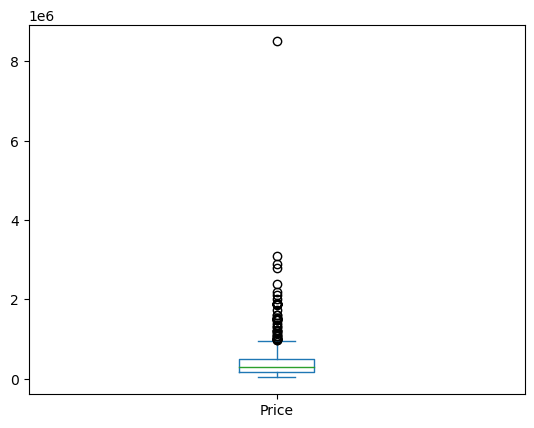

In [110]:
df['Price'].plot(kind = 'box') # I guess the outlier is easily visible in this case and we need to deal with it

In [114]:
df = df[df['Price']<8000000]

<Axes: >

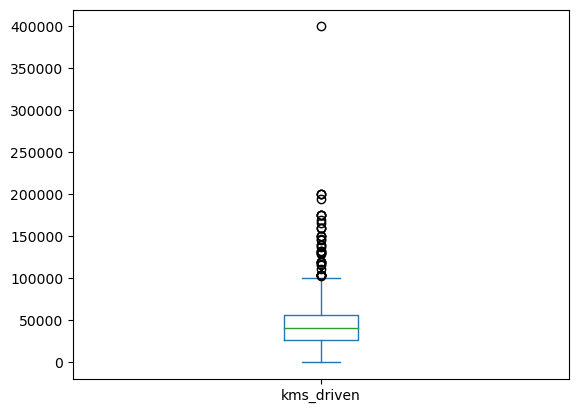

In [116]:
df['kms_driven'].plot(kind = 'box')

In [117]:
df = df[df['kms_driven']<250000]

In [119]:
df = df.reset_index(drop = True)

In [121]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Price')

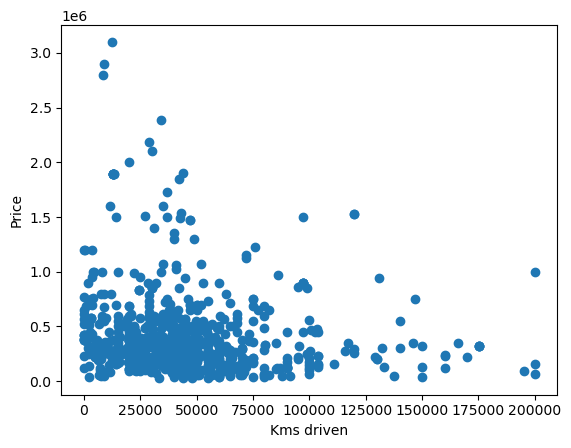

In [124]:
plt.scatter(df['kms_driven'], df['Price'])
plt.xlabel('Kms driven')
plt.ylabel('Price')

In [125]:
df.head(30)  ## Upon observation there seems to be some repeated rows

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
5,Hyundai Eon,Hyundai,2013,190000,25000,Petrol
6,Ford EcoSport Ambiente,Ford,2016,830000,24530,Diesel
7,Maruti Suzuki Alto,Maruti,2015,250000,60000,Petrol
8,Skoda Fabia Classic,Skoda,2010,182000,60000,Petrol
9,Maruti Suzuki Stingray,Maruti,2015,315000,30000,Petrol


In [129]:
df[df['name']=='Maruti Suzuki Swift']

,name,company,year,Price,kms_driven,fuel_type
28,Maruti Suzuki Swift,Maruti,2014,385000,35522,Diesel
30,Maruti Suzuki Swift,Maruti,2017,180000,15487,Petrol
49,Maruti Suzuki Swift,Maruti,2014,385000,35522,Diesel
51,Maruti Suzuki Swift,Maruti,2017,180000,15487,Petrol
55,Maruti Suzuki Swift,Maruti,2017,220000,30874,Petrol
94,Maruti Suzuki Swift,Maruti,2014,390000,35000,Petrol
100,Maruti Suzuki Swift,Maruti,2013,372000,13349,Petrol
116,Maruti Suzuki Swift,Maruti,2013,372000,13349,Petrol
123,Maruti Suzuki Swift,Maruti,2007,125000,70000,Petrol
131,Maruti Suzuki Swift,Maruti,2013,340000,41000,Petrol


In [130]:
df[df.duplicated()]

,name,company,year,Price,kms_driven,fuel_type
12,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
13,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
18,Mahindra Scorpio S10,Mahindra,2016,350000,43000,Diesel
22,Hyundai i20 Sportz,Hyundai,2012,100000,55000,Petrol
23,Hyundai i20 Sportz,Hyundai,2012,100000,55000,Petrol
...,...,...,...,...,...,...
601,Maruti Suzuki Swift,Maruti,2012,280000,48006,Diesel
682,Mahindra Scorpio S4,Mahindra,2015,865000,30000,Diesel
740,Maruti Suzuki Swift,Maruti,2009,120000,90000,Diesel
788,Hyundai Getz Prime,Hyundai,2009,115000,20000,Petrol


In [140]:
df= df.drop_duplicates()

In [143]:
df = df.reset_index(drop=True)

In [144]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
713,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
714,Tata Indica V2,Tata,2009,110000,30000,Diesel
715,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
716,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [146]:
df.to_csv('Cleaned_car.csv', index =False)

In [147]:
## Now we will do model training

In [149]:
X = df.drop('Price', axis =1)
y = df['Price']

In [150]:
## Performing train test split

In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [152]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [153]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [154]:
from sklearn.linear_model import LinearRegression

In [155]:
lr=LinearRegression()

In [156]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

In [157]:
pipe=make_pipeline(column_trans,lr)

In [158]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [159]:
y_pred=pipe.predict(X_test)

In [160]:
r2_score(y_test,y_pred)

0.517052750581941

In [162]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [163]:
np.argmax(scores)

134

In [164]:
scores[np.argmax(scores)] # so at random state 134 we get the maximum r2_score

0.9112777025856283

In [165]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([522661.64117305])

In [166]:
import  pickle

In [167]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))  ## I need to learn deployment now, until then we should leave it here...

In [168]:
## To be continued...

In [171]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Mahindra Scorpio S10','Mahindra',2019,60000,'Diesel']).reshape(1,5)))

array([640277.19746961])

## Let's take an example from olx and try to predict using our model  Maruti Suzuki Ciaz

In [180]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Ciaz','Maruti',2020,48000,'Petrol']).reshape(1,5)))

array([763524.1960514])

## The original price on olx was RS. 7,70,000 and our model predicts nearly same

In [185]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Honda City','Honda',2012,68000,'Petrol']).reshape(1,5)))

array([395366.44407387])

In [187]:
df[df['company']=='Honda']

,name,company,year,Price,kms_driven,fuel_type
33,Honda City 1.5,Honda,2011,280000,33000,Petrol
35,Honda Amaze,Honda,2013,284999,46000,Diesel
36,Honda Amaze 1.5,Honda,2015,345000,36000,Diesel
37,Honda City,Honda,2015,499999,55000,Petrol
43,Honda City ZX,Honda,2017,170000,15000,Diesel
50,Honda City,Honda,2015,448999,54000,Petrol
53,Honda Amaze,Honda,2015,344999,22000,Petrol
60,Honda Brio,Honda,2012,224999,30000,Petrol
66,Honda City 1.5,Honda,2005,90000,50000,Petrol
85,Honda Amaze 1.2,Honda,2014,325000,42000,Petrol


## The pricing in this case was given 3,25,000 and thus a difference of 70,000 which is huge

In [188]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Honda Amaze','Honda',2016,28800,'Petrol']).reshape(1,5)))

array([369109.44910513])

## The pricing in this case was given 3,49,000 and we might face a loss of 20k. which can be huge for someone like me.

In [190]:
# Name of car 
# Company name
# Year bought
# kms driven
# fuel type